## Short File Description

Abstract of what the file does. E.g.,

We download the population of every county in the continental US and make a choropleth
out of them.

### List of inputs

* Input file 1
* Input file 2

Any caveats around data, e.g., "This data is not stored with the repository as it is
highly sensitive. See XXX documentation on how to access the raw data."

### List of outputs

* Output file 1
* Output file 2

In [1]:
import os

import geopandas as gpd
import matplotlib
import pandas as pd
import us
from census import Census
from dotenv import load_dotenv
from tqdm.notebook import tqdm

from pyutils import utils

load_dotenv()

True

In [2]:
c = Census(os.environ["CENSUS_API_KEY"])

In [3]:
data = c.acs5.state_county(["B01001_001E"], "*", "*", year=2019)
df = pd.DataFrame(data)
df.head()

,B01001_001E,state,county
0,21565.0,17,051
1,29003.0,17,107
2,23994.0,17,165
3,701473.0,17,097
4,14219.0,17,127


In [4]:
# Download county shapefiles
gdfs = []

for state in tqdm(us.STATES + [us.states.DC]):
    if state.fips not in [us.states.HI.fips, us.states.AK.fips]:
        gdf = gpd.read_file(utils.path_from_cache(state.shapefile_urls("county")))
        gdfs.append(gdf)

gdf = pd.concat(gdfs)

  0%|          | 0/51 [00:00<?, ?it/s]

<AxesSubplot:>

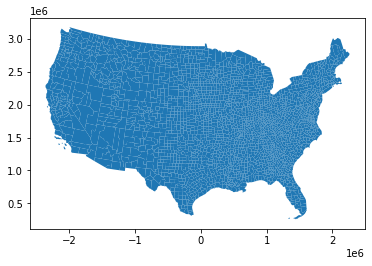

In [5]:
# Switch to the Albers projection
gdf = gdf.to_crs(epsg=5070)

# Make sure we got the right location
gdf.plot()

In [6]:
# Merge in population data
df["GEOID10"] = df["state"] + df["county"]
gdf = gdf.merge(df, on="GEOID10")

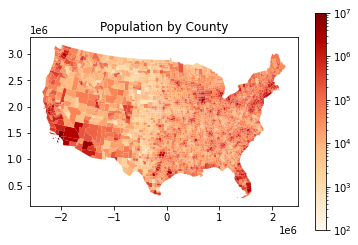

In [7]:
# Plot the data
ax = gdf.plot(
    column="B01001_001E",
    cmap="OrRd",
    legend=True,
    norm=matplotlib.colors.LogNorm(
        vmin=gdf["B01001_001E"].min(), vmax=gdf["B01001_001E"].max()
    ),
)

ax.set_title("Population by County");